In [2]:
#6.1.4
#Create latitude and longitude combinations

In [3]:
#Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
#Create a set of random latitude and longitude combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

#The zip object packs each pair of lats and lngs having the same index in their respective array into a tuple

In [5]:
#Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [6]:
print(coordinates)

[(-81.10026060177442, -26.832745540711016), (-21.59746015702305, 61.614259566709336), (3.536979413116711, 75.8247118213859), (-62.695351052877584, 131.1382518099556), (81.81316197193615, 60.28134211400277), (-58.26952153980017, -133.69976779039234), (-29.664634013846516, -99.18649782305845), (-43.6192975595093, 82.24906931630505), (-55.07403845315895, -57.426428359051656), (-22.835929594675108, 21.60875059354504), (57.15594543306068, -77.4136593729701), (-67.13718939184183, -138.49490851016478), (15.327913548183616, -157.70129896654385), (49.549977024468404, 66.75262042159392), (74.32102794562039, 70.11457968506218), (9.71764664665099, -44.97512467678027), (59.61650742637764, -90.34861646011092), (48.25418355549854, 161.5800610195801), (-58.018235652038136, 143.62054467076536), (-17.008027691232343, -40.35611064666699), (45.49536282279652, 176.5742064349639), (62.59774576176645, 124.77162505659459), (-42.587118244053805, 25.863035502977397), (-42.690868843356576, -139.6506247934184), (

In [7]:
#6.1.5
#Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [8]:
#Create a list for holding the cities.
cities = []

#Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
        
#Print the city count to confirm sufficient count.
len(cities)

623

In [12]:
print(cities)

['ushuaia', 'bambous virieux', 'felidhoo', 'new norfolk', 'amderma', 'rikitea', 'lebu', 'mahebourg', 'manyana', 'attawapiskat', 'hilo', 'derzhavinsk', 'yar-sale', 'cayenne', 'thompson', 'petropavlovsk-kamchatskiy', 'hobart', 'itanhem', 'nikolskoye', 'berdigestyakh', 'kruisfontein', 'klaksvik', 'neuquen', 'tuktoyaktuk', 'yarada', 'ribeira grande', 'busselton', 'puerto ayora', 'krasnoyarskiy', 'bluff', 'vaini', 'kapaa', 'fortuna', 'samarai', 'phan thiet', 'camacha', 'uthal', 'springfield', 'carnarvon', 'tigil', 'beyneu', 'kuliyapitiya', 'buta', 'ibra', 'avarua', 'ambilobe', 'yellowknife', 'kaduna', 'albany', 'mataura', 'wahran', 'hit', 'hermanus', 'ponta do sol', 'faanui', 'sola', 'punta arenas', 'cidreira', 'sur', 'soe', 'waingapu', 'port alfred', 'nabire', 'nome', 'la union', 'tomatlan', 'mys shmidta', 'yakeshi', 'westport', 'lake charles', 'san cristobal', 'kodiak', 'meadow lake', 'bahia blanca', 'isangel', 'grindavik', 'lakes entrance', 'qaanaaq', 'lewistown', 'ketchikan', 'beberibe'

In [13]:
#6.2.6
#Get the City Weather Data

We will need to do the following:

1. Import our dependencies and initialize counters and an empty list that will hold the weather data.
2. Loop through the cities list.
3. Group the cities in sets of 50 to log the process as we find the weather data for each city.
    - Two counters will be needed here: one to log the city count from 1 to 50, and another for the sets.
4. Build the city_url or endpoint for each city.
5. Log the URL and the record and set numbers.
6. Make an API request for each city.
7. Parse the JSON weather data for the following:
    - City, country, and date
    - Latitude and longitude
    - Maximum temperature
    - Humidity
    - Cloudiness
    - Wind speed
8. Add the data to a list in a dictionary format and then convert the list to a DataFrame.

In [14]:
#Import the requests library.
import requests

#Import the API key.
from config import weather_api_key

#Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [15]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [16]:
#Create an empty list to hold the weather data.
city_data = []

#Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

#Create counters.
record_count = 1
set_count = 1

#Loop through all the cities in our list.
#for i in range(len(cities)):
 #   #Group cities in sets of 50 for logging purposes.
  #  if (i % 50 == 0 and i >= 50):
   #     set_count += 1
    #    record_count = 1
     #   time.sleep(60)

    #Create endpoint URL with each city.
    #city_url = url + "&q=" + cities[i]    
    
#Loop through all the cities in the list.
for i, city in enumerate(cities):

    #Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    #Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    #Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    #Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        #Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        #Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})    
    
    
#If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

#Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------") 
    

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ushuaia
Processing Record 2 of Set 1 | bambous virieux
Processing Record 3 of Set 1 | felidhoo
City not found. Skipping...
Processing Record 4 of Set 1 | new norfolk
Processing Record 5 of Set 1 | amderma
City not found. Skipping...
Processing Record 6 of Set 1 | rikitea
Processing Record 7 of Set 1 | lebu
Processing Record 8 of Set 1 | mahebourg
Processing Record 9 of Set 1 | manyana
Processing Record 10 of Set 1 | attawapiskat
City not found. Skipping...
Processing Record 11 of Set 1 | hilo
Processing Record 12 of Set 1 | derzhavinsk
Processing Record 13 of Set 1 | yar-sale
Processing Record 14 of Set 1 | cayenne
Processing Record 15 of Set 1 | thompson
Processing Record 16 of Set 1 | petropavlovsk-kamchatskiy
Processing Record 17 of Set 1 | hobart
Processing Record 18 of Set 1 | itanhem
Processing Record 19 of Set 1 | nikolskoye
Processing Record 20 of Set 1 | berdigestyakh
Processing Record 2

Processing Record 38 of Set 4 | bowen
Processing Record 39 of Set 4 | ambon
Processing Record 40 of Set 4 | saint-philippe
Processing Record 41 of Set 4 | airai
Processing Record 42 of Set 4 | upernavik
Processing Record 43 of Set 4 | iwaki
Processing Record 44 of Set 4 | gilgit
Processing Record 45 of Set 4 | longyearbyen
Processing Record 46 of Set 4 | cape town
Processing Record 47 of Set 4 | floro
Processing Record 48 of Set 4 | goure
Processing Record 49 of Set 4 | rantepao
Processing Record 50 of Set 4 | botucatu
Processing Record 1 of Set 5 | ancud
Processing Record 2 of Set 5 | san patricio
Processing Record 3 of Set 5 | pacific grove
Processing Record 4 of Set 5 | chokurdakh
Processing Record 5 of Set 5 | vanimo
Processing Record 6 of Set 5 | sao filipe
Processing Record 7 of Set 5 | benguela
Processing Record 8 of Set 5 | luba
Processing Record 9 of Set 5 | kidal
Processing Record 10 of Set 5 | rawson
Processing Record 11 of Set 5 | vao
Processing Record 12 of Set 5 | kikwit


Processing Record 29 of Set 8 | portland
Processing Record 30 of Set 8 | belaya gora
Processing Record 31 of Set 8 | mitu
Processing Record 32 of Set 8 | balkanabat
Processing Record 33 of Set 8 | cootamundra
Processing Record 34 of Set 8 | yatou
Processing Record 35 of Set 8 | hede
Processing Record 36 of Set 8 | rosetta
Processing Record 37 of Set 8 | crixas
Processing Record 38 of Set 8 | necochea
Processing Record 39 of Set 8 | lavrentiya
Processing Record 40 of Set 8 | medea
Processing Record 41 of Set 8 | roald
Processing Record 42 of Set 8 | inhambane
Processing Record 43 of Set 8 | kamenskoye
City not found. Skipping...
Processing Record 44 of Set 8 | praia da vitoria
Processing Record 45 of Set 8 | rahatgarh
Processing Record 46 of Set 8 | beloha
Processing Record 47 of Set 8 | quatre cocos
Processing Record 48 of Set 8 | tura
Processing Record 49 of Set 8 | tabas
Processing Record 50 of Set 8 | kandalaksha
Processing Record 1 of Set 9 | calamar
Processing Record 2 of Set 9 | 

Processing Record 13 of Set 12 | itarema
Processing Record 14 of Set 12 | dudinka
Processing Record 15 of Set 12 | marcona
City not found. Skipping...
Processing Record 16 of Set 12 | mitsamiouli
Processing Record 17 of Set 12 | narsaq
Processing Record 18 of Set 12 | cedral
Processing Record 19 of Set 12 | safaga
Processing Record 20 of Set 12 | harper
Processing Record 21 of Set 12 | enshi
Processing Record 22 of Set 12 | irbit
Processing Record 23 of Set 12 | baijiantan
Processing Record 24 of Set 12 | kesinga
Processing Record 25 of Set 12 | fulitun
City not found. Skipping...
Processing Record 26 of Set 12 | umzimvubu
City not found. Skipping...
Processing Record 27 of Set 12 | trincomalee
Processing Record 28 of Set 12 | juneau
Processing Record 29 of Set 12 | puntarenas
Processing Record 30 of Set 12 | kapoeta
Processing Record 31 of Set 12 | haines junction
Processing Record 32 of Set 12 | ceres
Processing Record 33 of Set 12 | miyako
Processing Record 34 of Set 12 | irati
Proc

In [30]:
#Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ushuaia,-54.8000,-68.3000,37.06,93,40,21.85,AR,2022-04-04 00:47:43
1,Bambous Virieux,-20.3428,57.7575,79.21,83,75,10.36,MU,2022-04-04 00:47:44
2,New Norfolk,-42.7826,147.0587,65.91,65,58,2.35,AU,2022-04-04 00:46:57
3,Rikitea,-23.1203,-134.9692,77.43,65,100,9.60,PF,2022-04-04 00:47:43
4,Lebu,-37.6167,-73.6500,53.19,76,0,20.58,CL,2022-04-04 00:54:18
5,Mahebourg,-20.4081,57.7000,79.25,83,75,10.36,MU,2022-04-04 00:54:18
6,Manyana,-23.4000,21.7167,64.92,85,100,7.09,BW,2022-04-04 00:54:18
7,Hilo,19.7297,-155.0900,76.24,90,100,5.01,US,2022-04-04 00:51:51
8,Derzhavinsk,51.1000,66.3167,36.90,74,100,10.58,KZ,2022-04-04 00:54:19
9,Yar-Sale,66.8333,70.8333,15.22,88,100,19.44,RU,2022-04-04 00:54:19


In [31]:
#6.2.7

In [32]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ushuaia,AR,2022-04-04 00:47:43,-54.8000,-68.3000,37.06,93,40,21.85
1,Bambous Virieux,MU,2022-04-04 00:47:44,-20.3428,57.7575,79.21,83,75,10.36
2,New Norfolk,AU,2022-04-04 00:46:57,-42.7826,147.0587,65.91,65,58,2.35
3,Rikitea,PF,2022-04-04 00:47:43,-23.1203,-134.9692,77.43,65,100,9.60
4,Lebu,CL,2022-04-04 00:54:18,-37.6167,-73.6500,53.19,76,0,20.58
5,Mahebourg,MU,2022-04-04 00:54:18,-20.4081,57.7000,79.25,83,75,10.36
6,Manyana,BW,2022-04-04 00:54:18,-23.4000,21.7167,64.92,85,100,7.09
7,Hilo,US,2022-04-04 00:51:51,19.7297,-155.0900,76.24,90,100,5.01
8,Derzhavinsk,KZ,2022-04-04 00:54:19,51.1000,66.3167,36.90,74,100,10.58
9,Yar-Sale,RU,2022-04-04 00:54:19,66.8333,70.8333,15.22,88,100,19.44


In [33]:
#Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

#Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [34]:
#6.3.1
#Plot Latitude vs. Max Temperature

In [36]:
#Extract relevant fields from the DataFrame for plotting
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

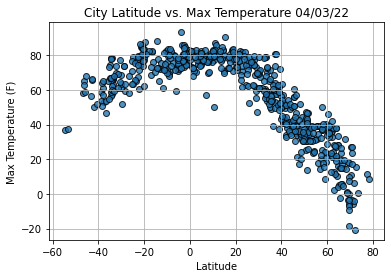

In [40]:
#Import time module
import time

#Build the scatter plot for latitude vs. max temperature
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature " + time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure
plt.savefig("weather_data/Fig1.png")

#Show plt
plt.show()

In [41]:
#6.3.2
#Plat latitude vs. Humidity

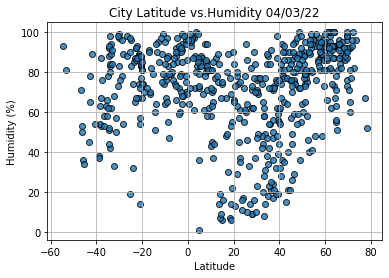

In [43]:
#Build the scatter plot for latitude vs. hudmity
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs.Humidity " + time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure
plt.savefig("weather_data/Fig2.png")

#Show plt
plt.show()

In [ ]:
#6.3.3
#Plat latitude vs. Cloudiness

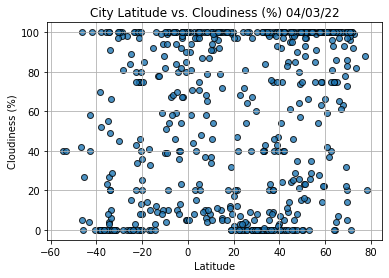

In [45]:
#Build the scatter plot for latitude vs. cloudiness
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness (%) " + time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure
plt.savefig("weather_data/Fig3.png")

#Show plt
plt.show()

In [ ]:
#6.3.4
#Plot Latitude vs. Wind Speed

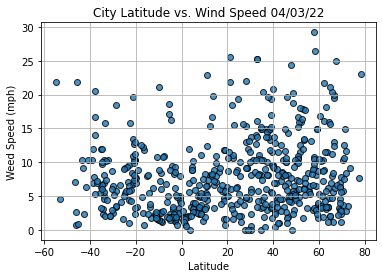

In [46]:
#Build the scatter plot for latitude vs. wind speed
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed " + time.strftime("%x"))
plt.ylabel("Weed Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure
plt.savefig("weather_data/Fig4.png")

#Show plt
plt.show()